In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import scipy.stats as stats
import pickle

In [2]:
with open(r'../../data/df_train_stat_proccessed.pkl', 'rb') as f:
    df_train = pickle.load(f)

with open(r'../../data/df_test.pkl', 'rb') as f:
    df_test = pickle.load(f)

# 1. Построим тепловую карту корреляции

In [3]:
corr = df_train.corr()

<Axes: >

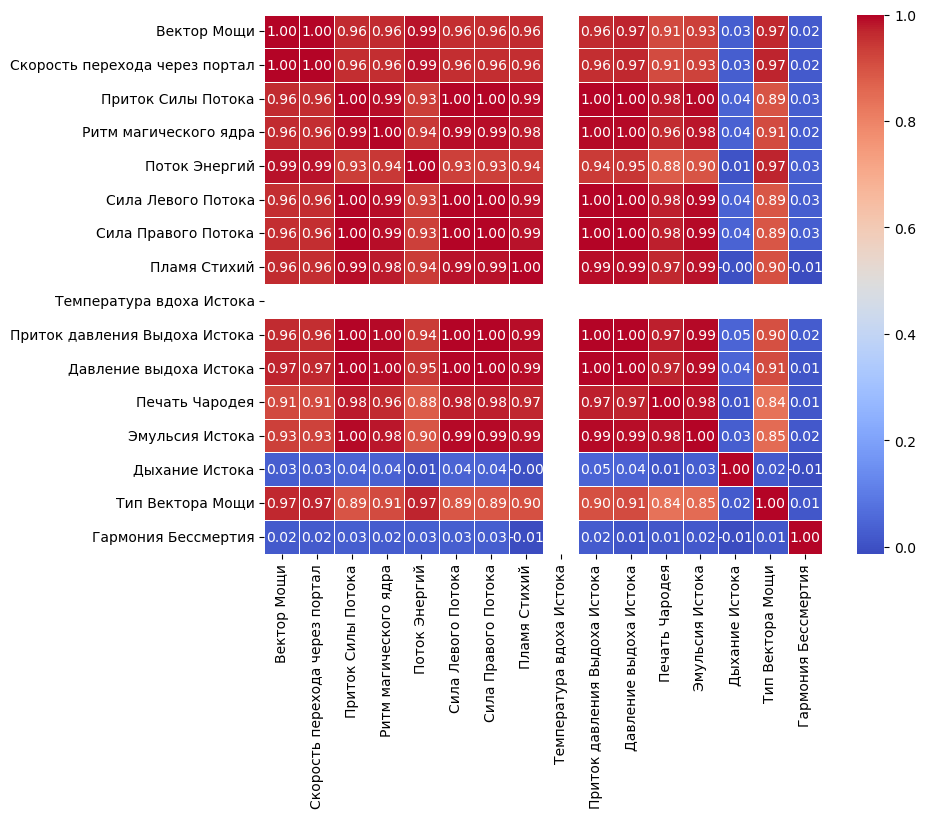

In [4]:
plt.figure(figsize=(9, 7))
sns.heatmap(
    corr,
    annot=True,           
    fmt=".2f",            
    cmap="coolwarm",      
    linewidths=0.5        
)

In [5]:
df_train.head()

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Температура вдоха Истока,Приток давления Выдоха Истока,Давление выдоха Истока,Печать Чародея,Эмульсия Истока,Дыхание Истока,Тип Вектора Мощи,Гармония Бессмертия
8352,1.138,1.54332,4855.828,138.294898,6632.781,5.864,5.864,593.795,736.0,1.251,6.754,30.084,0.261,0.985,1.0,0.993
2542,5.140,7.71660,21637.112,201.517147,8505.087,175.319,175.319,704.763,736.0,2.075,10.963,24.906,0.493,0.960,3.0,0.997
3562,8.206,12.34656,50996.143,323.328422,9311.233,438.007,438.007,936.812,736.0,3.583,18.576,61.369,1.215,0.965,4.0,0.980
3371,6.175,9.25992,29791.710,241.632772,8823.437,246.257,246.257,781.806,736.0,2.504,13.245,34.669,0.686,0.964,3.0,0.985
6000,7.148,10.80324,38990.686,280.447568,9128.197,332.290,332.290,821.369,736.0,2.971,15.488,43.688,0.865,0.975,4.0,0.991


In [6]:
df_train['Температура вдоха Истока'].value_counts()

Температура вдоха Истока
736.0    9422
Name: count, dtype: int64

In [7]:
df_train['Общая мощность потоков'] = df_train['Сила Левого Потока'] + df_train['Сила Правого Потока'] + df_train['Приток Силы Потока']

df_test['Общая мощность потоков'] = df_test['Сила Левого Потока'] + df_test['Сила Правого Потока'] + df_test['Приток Силы Потока']

In [8]:
df_train.head()

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Температура вдоха Истока,Приток давления Выдоха Истока,Давление выдоха Истока,Печать Чародея,Эмульсия Истока,Дыхание Истока,Тип Вектора Мощи,Гармония Бессмертия,Общая мощность потоков
8352,1.138,1.54332,4855.828,138.294898,6632.781,5.864,5.864,593.795,736.0,1.251,6.754,30.084,0.261,0.985,1.0,0.993,4867.556
2542,5.140,7.71660,21637.112,201.517147,8505.087,175.319,175.319,704.763,736.0,2.075,10.963,24.906,0.493,0.960,3.0,0.997,21987.750
3562,8.206,12.34656,50996.143,323.328422,9311.233,438.007,438.007,936.812,736.0,3.583,18.576,61.369,1.215,0.965,4.0,0.980,51872.157
3371,6.175,9.25992,29791.710,241.632772,8823.437,246.257,246.257,781.806,736.0,2.504,13.245,34.669,0.686,0.964,3.0,0.985,30284.224
6000,7.148,10.80324,38990.686,280.447568,9128.197,332.290,332.290,821.369,736.0,2.971,15.488,43.688,0.865,0.975,4.0,0.991,39655.266


In [9]:
df_train['Общая мощность ядра'] = df_train['Ритм магического ядра'] * df_train['Приток Силы Потока']

df_test['Общая мощность ядра'] = df_test['Ритм магического ядра'] * df_test['Приток Силы Потока']

In [10]:
df_train['Общее давление на выходе'] = df_train['Приток давления Выдоха Истока'] + df_train['Давление выдоха Истока']

df_test['Общее давление на выходе'] = df_test['Приток давления Выдоха Истока'] + df_test['Давление выдоха Истока']

In [11]:
df_train['Магическая производительность'] = df_train['Скорость перехода через портал'] / df_train['Эмульсия Истока']

df_test['Магическая производительность'] = df_test['Скорость перехода через портал'] / df_test['Эмульсия Истока']

In [12]:
df_train['Эффективность ядра'] = df_train['Общая мощность ядра'] / df_train['Эмульсия Истока']

df_test['Эффективность ядра'] = df_test['Общая мощность ядра'] / df_test['Эмульсия Истока']

In [13]:
df_train.head()

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Температура вдоха Истока,Приток давления Выдоха Истока,...,Печать Чародея,Эмульсия Истока,Дыхание Истока,Тип Вектора Мощи,Гармония Бессмертия,Общая мощность потоков,Общая мощность ядра,Общее давление на выходе,Магическая производительность,Эффективность ядра
8352,1.138,1.54332,4855.828,138.294898,6632.781,5.864,5.864,593.795,736.0,1.251,...,30.084,0.261,0.985,1.0,0.993,4867.556,6.715362e+05,8.005,5.913103,2.572936e+06
2542,5.140,7.71660,21637.112,201.517147,8505.087,175.319,175.319,704.763,736.0,2.075,...,24.906,0.493,0.960,3.0,0.997,21987.750,4.360249e+06,13.038,15.652333,8.844319e+06
3562,8.206,12.34656,50996.143,323.328422,9311.233,438.007,438.007,936.812,736.0,3.583,...,61.369,1.215,0.965,4.0,0.980,51872.157,1.648850e+07,22.159,10.161778,1.357078e+07
3371,6.175,9.25992,29791.710,241.632772,8823.437,246.257,246.257,781.806,736.0,2.504,...,34.669,0.686,0.964,3.0,0.985,30284.224,7.198653e+06,15.749,13.498426,1.049366e+07
6000,7.148,10.80324,38990.686,280.447568,9128.197,332.290,332.290,821.369,736.0,2.971,...,43.688,0.865,0.975,4.0,0.991,39655.266,1.093484e+07,18.459,12.489295,1.264144e+07


In [14]:
df_train['Магическая мощность'] = df_train['Эмульсия Истока'] + df_train['Общее давление на выходе'] + df_train['Пламя Стихий'] - df_train['Температура вдоха Истока']

df_test['Магическая мощность'] = df_test['Эмульсия Истока'] + df_test['Общее давление на выходе'] + df_test['Пламя Стихий'] - df_test['Температура вдоха Истока']

In [15]:
# df_train['Степень износа магических источников'] = df_train['Дыхание Истока'] / df_train['Гармония Бессмертия']

# df_test['Степень износа магических источников'] = df_test['Дыхание Истока'] / df_test['Гармония Бессмертия']

In [16]:
# df_train['Расхождение в стабильности магии'] = abs(df_train['Дыхание Истока'] - df_train['Гармония Бессмертия'])

# df_test['Расхождение в стабильности магии'] = abs(df_test['Дыхание Истока'] - df_test['Гармония Бессмертия'])

In [17]:
# df_train['Баланс угасания'] = (df_train['Дыхание Истока'] - df_train['Гармония Бессмертия']) / df_train['Скорость перехода через портал']

# df_test['Баланс угасания'] = (df_test['Дыхание Истока'] - df_test['Гармония Бессмертия']) / df_test['Скорость перехода через портал']

In [18]:
corr = df_train.corr()

<Axes: >

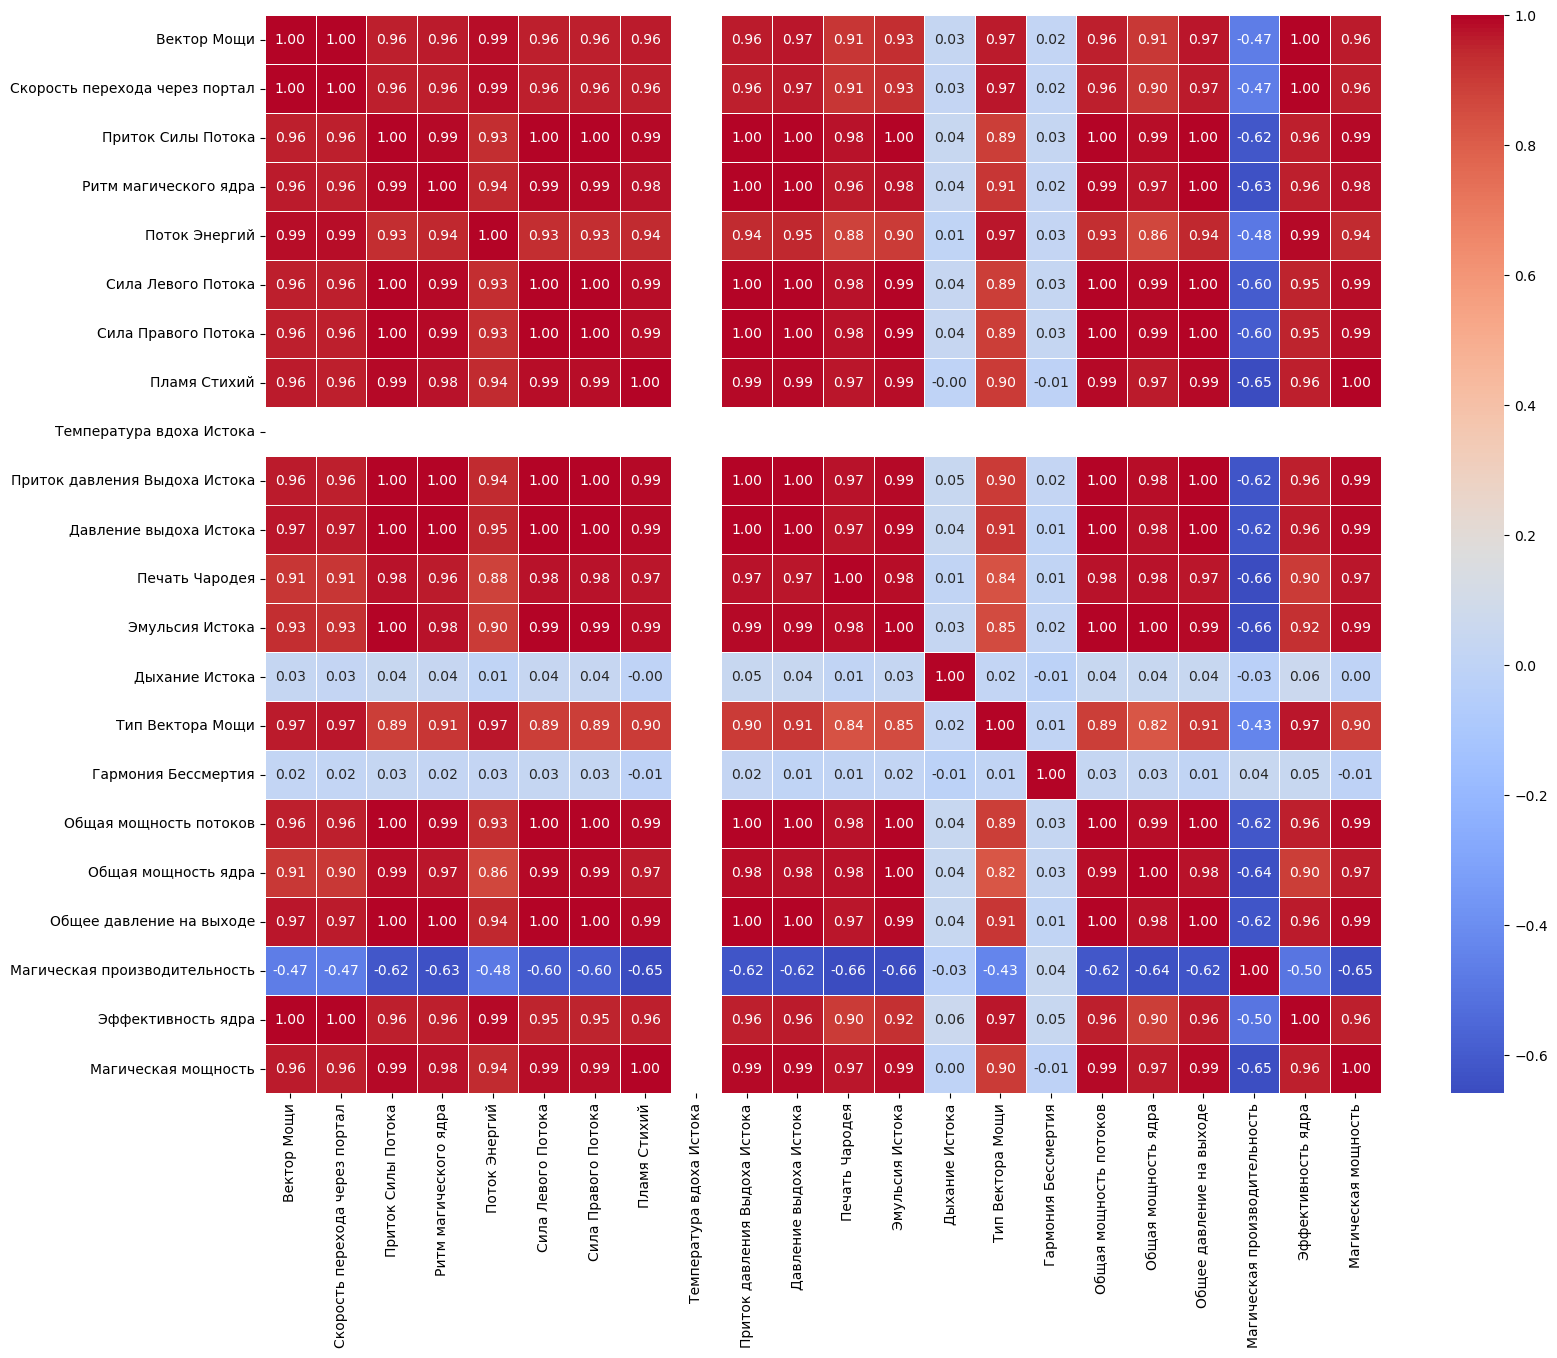

In [19]:
plt.figure(figsize=(18, 14))
sns.heatmap(
    corr,
    annot=True,           
    fmt=".2f",            
    cmap="coolwarm",      
    linewidths=0.5        
)

In [20]:
dropped_columns = [
    'Сила Левого Потока',
    'Сила Правого Потока',
    'Приток Силы Потока',
    'Ритм магического ядра',
    'Приток давления Выдоха Истока',
    'Давление выдоха Истока',
    'Скорость перехода через портал',
    'Эмульсия Истока',
    'Общая мощность ядра',
    'Общее давление на выходе',
    'Пламя Стихий',
    'Температура вдоха Истока',
]
df_train = df_train.drop(columns=dropped_columns)
df_test = df_test.drop(columns=dropped_columns)

In [21]:
corr = df_train.corr()

<Axes: >

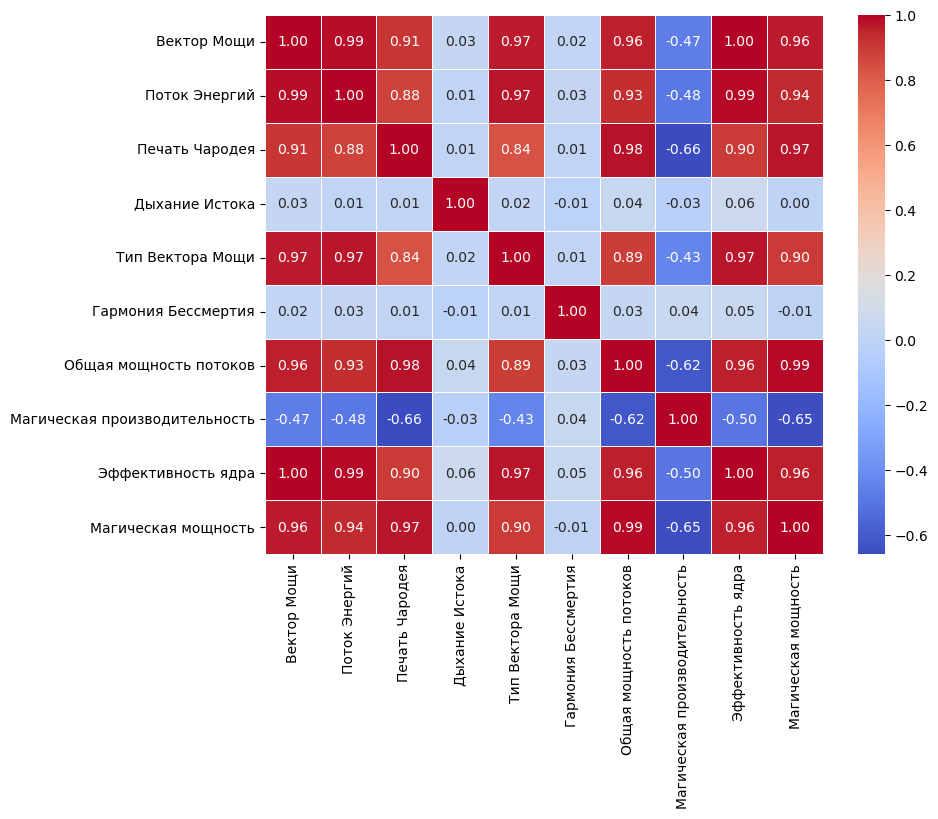

In [22]:
plt.figure(figsize=(9, 7))
sns.heatmap(
    corr,
    annot=True,           
    fmt=".2f",            
    cmap="coolwarm",      
    linewidths=0.5        
)

In [23]:
df_train.describe()

,Вектор Мощи,Поток Энергий,Печать Чародея,Дыхание Истока,Тип Вектора Мощи,Гармония Бессмертия,Общая мощность потоков,Магическая производительность,Эффективность ядра,Магическая мощность
count,9422.000000,9422.000000,9422.000000,9422.000000,9422.000000,9422.00000,9422.000000,9422.000000,9.422000e+03,9422.000000
mean,5.117454,8182.564936,32.874276,0.975194,2.651666,0.98763,27114.049646,13.905009,8.706271e+06,10.002945
std,2.597482,1082.442798,25.096745,0.014645,1.152466,0.00749,22015.014061,4.220716,4.370887e+06,175.910054
min,1.138000,6589.002000,0.000000,0.950000,1.000000,0.97500,267.547000,4.566036,4.373923e+05,-286.576000
25%,3.144000,7055.476750,12.987250,0.963000,2.000000,0.98100,8496.362250,10.445482,4.906261e+06,-137.825500
50%,5.140000,8479.590500,25.217500,0.975000,3.000000,0.98800,21980.418000,13.657699,8.752873e+06,-17.112500
75%,7.148000,9130.609500,44.338500,0.988000,4.000000,0.99400,39662.956250,17.945581,1.266360e+07,114.300000
max,9.300000,9797.103000,91.008000,1.000000,4.000000,1.00000,74075.284000,25.094634,1.591427e+07,394.252000


In [24]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [25]:
std_scaler = StandardScaler()
df_train_std_scaled = std_scaler.fit_transform(df_train)
df_train_std_scaled = pd.DataFrame(
    df_train_std_scaled,
    columns=df_train.columns,  
    index=df_train.index        
)

In [26]:
df_train_std_scaled.describe()

,Вектор Мощи,Поток Энергий,Печать Чародея,Дыхание Истока,Тип Вектора Мощи,Гармония Бессмертия,Общая мощность потоков,Магическая производительность,Эффективность ядра,Магическая мощность
count,9.422000e+03,9.422000e+03,9.422000e+03,9.422000e+03,9.422000e+03,9.422000e+03,9.422000e+03,9.422000e+03,9.422000e+03,9.422000e+03
mean,-3.348344e-16,2.021073e-16,-6.183879e-17,6.108465e-17,8.144621e-17,1.223277e-14,8.747926e-17,-1.478098e-16,-5.731400e-17,7.541315e-18
std,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00
min,-1.532124e+00,-1.472269e+00,-1.309971e+00,-1.720437e+00,-1.433234e+00,-1.686215e+00,-1.219528e+00,-2.212769e+00,-1.891908e+00,-1.686059e+00
25%,-7.597967e-01,-1.041300e+00,-7.924566e-01,-8.326879e-01,-5.654837e-01,-8.851569e-01,-8.457263e-01,-8.196975e-01,-8.694373e-01,-8.404084e-01
50%,8.680428e-03,2.744176e-01,-3.051066e-01,-1.322716e-02,3.022667e-01,4.941076e-02,-2.332001e-01,-5.859744e-02,1.066241e-02,-1.541520e-01
75%,7.817777e-01,8.758845e-01,4.568255e-01,8.745220e-01,1.170017e+00,8.504687e-01,5.700461e-01,9.573699e-01,9.054316e-01,5.929314e-01
max,1.610316e+00,1.491648e+00,2.316508e+00,1.693983e+00,1.170017e+00,1.651527e+00,2.133259e+00,2.651261e+00,1.649180e+00,2.184466e+00


In [27]:
minmax_scaler = MinMaxScaler()
df_train_minmax_scaled = minmax_scaler.fit_transform(df_train)
df_train_minmax_scaled = pd.DataFrame(
    df_train_minmax_scaled,
    columns=df_train.columns,  
    index=df_train.index        
)

In [28]:
df_train_minmax_scaled.describe()

,Вектор Мощи,Поток Энергий,Печать Чародея,Дыхание Истока,Тип Вектора Мощи,Гармония Бессмертия,Общая мощность потоков,Магическая производительность,Эффективность ядра,Магическая мощность
count,9422.000000,9422.000000,9422.000000,9422.000000,9422.000000,9422.000000,9422.000000,9422.000000,9422.000000,9422.000000
mean,0.487559,0.496731,0.361224,0.503874,0.550555,0.505196,0.363736,0.454925,0.534273,0.435615
std,0.318241,0.337409,0.275764,0.292891,0.384155,0.299620,0.298275,0.205602,0.282414,0.258377
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.245773,0.145405,0.142704,0.260000,0.333333,0.240000,0.111490,0.286403,0.288745,0.218485
50%,0.490321,0.589317,0.277091,0.500000,0.666667,0.520000,0.294182,0.442878,0.537284,0.395788
75%,0.736339,0.792247,0.487193,0.760000,1.000000,0.760000,0.533757,0.651752,0.789966,0.588807
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
robust_scaler = RobustScaler()
df_train_robust_scaled = robust_scaler.fit_transform(df_train)
df_train_robust_scaled = pd.DataFrame(
    df_train_robust_scaled,
    columns=df_train.columns,  
    index=df_train.index        
)

In [30]:
df_train_robust_scaled.describe()

,Вектор Мощи,Поток Энергий,Печать Чародея,Дыхание Истока,Тип Вектора Мощи,Гармония Бессмертия,Общая мощность потоков,Магическая производительность,Эффективность ядра,Магическая мощность
count,9422.000000,9.422000e+03,9.422000e+03,9422.000000,9422.000000,9422.000000,9.422000e+03,9422.000000,9422.000000,9422.000000
mean,-0.005631,-1.431357e-01,2.442255e-01,0.007748,-0.174167,-0.028469,1.647158e-01,0.032974,-0.006007,0.107547
std,0.648722,5.216258e-01,8.005022e-01,0.585782,0.576233,0.576192,7.063657e-01,0.562755,0.563452,0.697708
min,-0.999500,-9.110687e-01,-8.043539e-01,-1.000000,-1.000000,-1.000000,-6.966713e-01,-1.212206,-1.071950,-1.068767
25%,-0.498501,-6.862760e-01,-3.901041e-01,-0.480000,-0.500000,-0.538462,-4.326445e-01,-0.428290,-0.495867,-0.478781
50%,0.000000,4.382820e-16,-5.665973e-17,0.000000,0.000000,0.000000,5.836344e-17,0.000000,0.000000,0.000000
75%,0.501499,3.137240e-01,6.098959e-01,0.520000,0.500000,0.461538,5.673555e-01,0.571710,0.504133,0.521219
max,1.038961,6.349052e-01,2.098497e+00,1.000000,0.500000,0.923077,1.671497e+00,1.524905,0.923177,1.631586


In [31]:
df_test_std_scaled = std_scaler.transform(df_test)
df_test_std_scaled = pd.DataFrame(
    df_test_std_scaled,
    columns=df_test.columns,  
    index=df_test.index        
)

In [32]:
df_test_minmax_scaled = minmax_scaler.transform(df_test)
df_test_minmax_scaled = pd.DataFrame(
    df_test_minmax_scaled,
    columns=df_test.columns,  
    index=df_test.index        
)

In [33]:
df_test_robust_scaled = robust_scaler.transform(df_test)
df_test_robust_scaled = pd.DataFrame(
    df_test_robust_scaled,
    columns=df_test.columns,  
    index=df_test.index        
)

In [35]:
df_train_robust_scaled.head()

,Вектор Мощи,Поток Энергий,Печать Чародея,Дыхание Истока,Тип Вектора Мощи,Гармония Бессмертия,Общая мощность потоков,Магическая производительность,Эффективность ядра,Магическая мощность
8352,-0.999500,-0.889972,0.155225,0.40,-1.0,0.384615,-0.549077,-1.032599,-0.796657,-0.463366
2542,0.000000,0.012287,-0.009936,-0.60,0.0,0.692308,0.000235,0.265948,0.011788,-0.002354
3562,0.765734,0.400766,1.153112,-0.40,0.5,-0.615385,0.959095,-0.466117,0.621078,0.957057
3371,0.258492,0.165699,0.301471,-0.44,0.0,-0.230769,0.266433,-0.021236,0.224406,0.314738
6000,0.501499,0.312561,0.589147,0.00,0.5,0.230769,0.567109,-0.155785,0.501275,0.483115


In [36]:
data = {
    'df_train_std_scaled': df_train_std_scaled,
    'df_test_std_scaled': df_test_std_scaled,
    'df_train_minmax_scaled': df_train_minmax_scaled,
    'df_test_minmax_scaled': df_test_minmax_scaled,
    'df_train_robust_scaled': df_train_robust_scaled,
    'df_test_robust_scaled': df_test_robust_scaled,
}

In [37]:
with open(r'../../data/lab5_scaled_data.pkl', 'wb') as f:
    pickle.dump(data, f)

# Доп. задание (PCA)

In [38]:
from sklearn.decomposition import PCA

In [46]:
X_train_std = df_train_std_scaled.drop(columns=['Гармония Бессмертия'])
X_test_std = df_test_std_scaled.drop(columns=['Гармония Бессмертия'])
y_train_std = df_train_std_scaled['Гармония Бессмертия']
y_test_std = df_test_std_scaled['Гармония Бессмертия']

X_train_minmax = df_train_minmax_scaled.drop(columns=['Гармония Бессмертия'])
X_test_minmax = df_test_minmax_scaled.drop(columns=['Гармония Бессмертия'])
y_train_minmax = df_train_minmax_scaled['Гармония Бессмертия']
y_test_minmax = df_test_minmax_scaled['Гармония Бессмертия']

X_train_robust = df_train_robust_scaled.drop(columns=['Гармония Бессмертия'])
X_test_robust = df_test_robust_scaled.drop(columns=['Гармония Бессмертия'])
y_train_robust = df_train_robust_scaled['Гармония Бессмертия']
y_test_robust = df_test_robust_scaled['Гармония Бессмертия']

In [47]:
pca_std = PCA(n_components=X_train_std.shape[1])
pca_std.fit(X_train_std)

pca_minmax = PCA(n_components=X_train_minmax.shape[1])
pca_minmax.fit(X_train_minmax)

pca_robust = PCA(n_components=X_train_robust.shape[1])
pca_robust.fit(X_train_robust)

PCA(n_components=9)

In [52]:
explained_variance_ratio_std= pca_std.explained_variance_ratio_
cumulative_variance_std = np.cumsum(explained_variance_ratio_std)

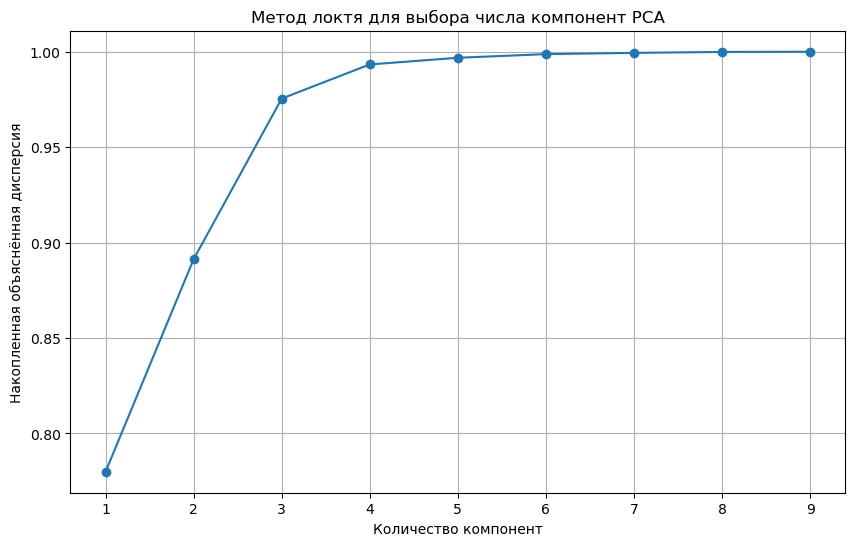

In [53]:
plt.figure(figsize=(10,6))
plt.plot(range(1, len(cumulative_variance_std)+1), cumulative_variance_std, marker='o')
plt.xlabel('Количество компонент')
plt.ylabel('Накопленная объяснённая дисперсия')
plt.title('Метод локтя для выбора числа компонент PCA')
plt.grid(True)
plt.show()

In [54]:
explained_variance_ratio_mn = pca_minmax.explained_variance_ratio_
cumulative_variance_mn = np.cumsum(explained_variance_ratio_mn)

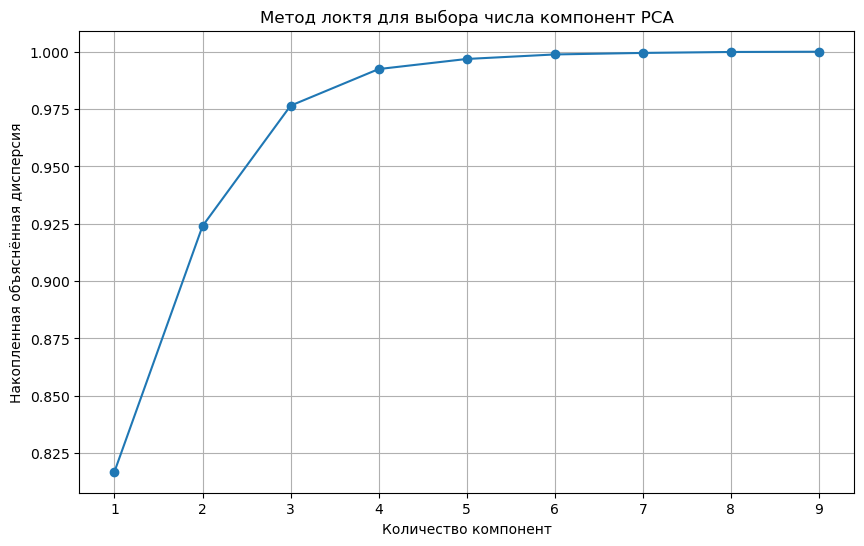

In [55]:
plt.figure(figsize=(10,6))
plt.plot(range(1, len(cumulative_variance_mn)+1), cumulative_variance_mn, marker='o')
plt.xlabel('Количество компонент')
plt.ylabel('Накопленная объяснённая дисперсия')
plt.title('Метод локтя для выбора числа компонент PCA')
plt.grid(True)
plt.show()

In [56]:
explained_variance_ratio_rob = pca_robust.explained_variance_ratio_
cumulative_variance_rob = np.cumsum(explained_variance_ratio_rob)

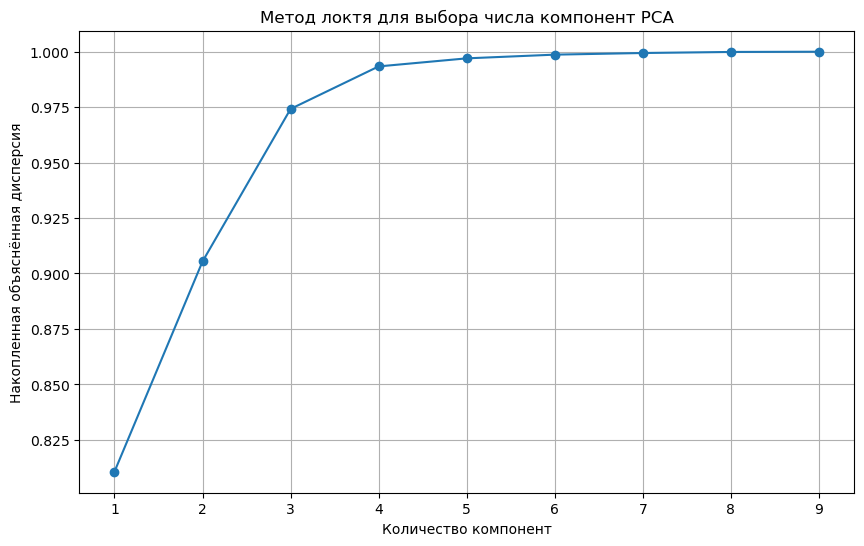

In [57]:
plt.figure(figsize=(10,6))
plt.plot(range(1, len(cumulative_variance_rob)+1), cumulative_variance_rob, marker='o')
plt.xlabel('Количество компонент')
plt.ylabel('Накопленная объяснённая дисперсия')
plt.title('Метод локтя для выбора числа компонент PCA')
plt.grid(True)
plt.show()

In [58]:
pca_std = PCA(n_components=4)
X_train_pca_std = pca_std.fit_transform(X_train)
X_test_pca_std = pca_std.transform(X_test)

pca_minmax = PCA(n_components=4)
X_train_pca_minmax = pca_minmax.fit_transform(X_train)
X_test_pca_minmax = pca_minmax.transform(X_test)

pca_robust = PCA(n_components=4)
X_train_pca_robust = pca_robust.fit_transform(X_train)
X_test_pca_robust = pca_robust.transform(X_test)

In [59]:
X_train_pca_df_std = pd.DataFrame(X_train_pca_std, columns=[f'PC{i+1}' for i in range(4)], index=X_train.index)
X_test_pca_df_std = pd.DataFrame(X_test_pca_std, columns=[f'PC{i+1}' for i in range(4)], index=X_test.index)

X_train_pca_df_minmax = pd.DataFrame(X_train_pca_minmax, columns=[f'PC{i+1}' for i in range(4)], index=X_train.index)
X_test_pca_df_minmax = pd.DataFrame(X_test_pca_minmax, columns=[f'PC{i+1}' for i in range(4)], index=X_test.index)

X_train_pca_df_robust = pd.DataFrame(X_train_pca_robust, columns=[f'PC{i+1}' for i in range(4)], index=X_train.index)
X_test_pca_df_robust = pd.DataFrame(X_test_pca_robust, columns=[f'PC{i+1}' for i in range(4)], index=X_test.index)

In [60]:
with open(r'../../data/pca_data_scaled.pkl', 'wb') as f:
    data = {
        'X_train_std': X_train_pca_df_std,
        'X_test_std': X_train_pca_df_std,
        'X_train_minmax': X_train_pca_df_minmax,
        'X_test_minmax': X_test_pca_df_minmax,
        'X_train_robust': X_train_pca_df_robust,
        'X_test_robust': X_test_pca_df_robust,
        'y_train': y_train,
        'y_test': y_test
    }
    pickle.dump(data, f)